In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

In [4]:
# Load your dataset in XLSX format
data = pd.read_excel('final version of data.xlsx')

# Assuming your dataset has a 'date' column and a 'consumption' column
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data = data.drop(['no'], axis=1)
data = data.replace({'day':{'Saturday':1, 'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5, 'Thursday':6, 'Friday':7}})
data

,time (hour),year,cons (m3/unit),month,day,holiday,T air©
date,,,,,,,
2023-02-03,12,2023,0.525037,3,6,0,18.2
2023-02-03,13,2023,0.487244,3,6,0,18.0
2023-02-03,14,2023,0.472253,3,6,0,17.0
2023-02-03,15,2023,0.469390,3,6,0,15.8
2023-02-03,16,2023,0.481152,3,6,0,12.0
...,...,...,...,...,...,...,...
2022-05-17,3,2022,0.013833,5,4,0,10.7
2022-05-17,4,2022,0.034500,5,4,0,13.0
2022-05-17,5,2022,0.041097,5,4,0,16.0


In [5]:
for i in range(24):
    data[str(i)] = data['cons (m3/unit)'].shift(i)
data

,time (hour),year,cons (m3/unit),month,day,holiday,T air©,0,1,2,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2023-02-03,12,2023,0.525037,3,6,0,18.2,0.525037,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-03,13,2023,0.487244,3,6,0,18.0,0.487244,0.525037,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-03,14,2023,0.472253,3,6,0,17.0,0.472253,0.487244,0.525037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-03,15,2023,0.469390,3,6,0,15.8,0.469390,0.472253,0.487244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-03,16,2023,0.481152,3,6,0,12.0,0.481152,0.469390,0.472253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,3,2022,0.013833,5,4,0,10.7,0.013833,0.013819,0.013681,...,0.077431,0.083250,0.089375,0.057681,0.083944,0.097667,0.072653,0.046833,0.067292,0.033986
2022-05-17,4,2022,0.034500,5,4,0,13.0,0.034500,0.013833,0.013819,...,0.064861,0.077431,0.083250,0.089375,0.057681,0.083944,0.097667,0.072653,0.046833,0.067292
2022-05-17,5,2022,0.041097,5,4,0,16.0,0.041097,0.034500,0.013833,...,0.084264,0.064861,0.077431,0.083250,0.089375,0.057681,0.083944,0.097667,0.072653,0.046833


In [6]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [7]:
train_data = train_data.dropna()
train_data

,time (hour),year,cons (m3/unit),month,day,holiday,T air©,0,1,2,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2023-03-03,11,2023,0.521053,3,7,1,18.0,0.521053,0.464901,0.518719,...,0.507374,0.461595,0.537663,0.457685,0.519175,0.481152,0.469390,0.472253,0.487244,0.525037
2023-03-03,12,2023,0.515412,3,7,1,17.9,0.515412,0.521053,0.464901,...,0.494180,0.507374,0.461595,0.537663,0.457685,0.519175,0.481152,0.469390,0.472253,0.487244
2023-03-03,13,2023,0.463728,3,7,1,18.0,0.463728,0.515412,0.521053,...,0.484763,0.494180,0.507374,0.461595,0.537663,0.457685,0.519175,0.481152,0.469390,0.472253
2023-03-03,14,2023,0.491975,3,7,1,18.0,0.491975,0.463728,0.515412,...,0.506173,0.484763,0.494180,0.507374,0.461595,0.537663,0.457685,0.519175,0.481152,0.469390
2023-03-03,15,2023,0.461253,3,7,1,15.8,0.461253,0.491975,0.463728,...,0.447814,0.506173,0.484763,0.494180,0.507374,0.461595,0.537663,0.457685,0.519175,0.481152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24,13,2022,0.260056,3,6,1,18.0,0.260056,0.285417,0.266389,...,0.226000,0.238792,0.225153,0.230986,0.249500,0.248514,0.235653,0.261264,0.228500,0.234986
2022-03-24,14,2022,0.247097,3,6,1,17.0,0.247097,0.260056,0.285417,...,0.259931,0.226000,0.238792,0.225153,0.230986,0.249500,0.248514,0.235653,0.261264,0.228500
2022-03-24,15,2022,0.240875,3,6,1,16.5,0.240875,0.247097,0.260056,...,0.247639,0.259931,0.226000,0.238792,0.225153,0.230986,0.249500,0.248514,0.235653,0.261264


In [8]:
y_train = train_data['cons (m3/unit)'].to_numpy()
X_train = train_data.drop(['cons (m3/unit)'], axis=1).to_numpy()
y_test = test_data['cons (m3/unit)'].to_numpy()
X_test = test_data.drop(['cons (m3/unit)'], axis=1).to_numpy()

In [9]:
X_train.shape

(5119, 30)

In [10]:
# Create and compile the LSTM model
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
# The output layer
model.add(Flatten())
model.add(Dense(units=1, activation='linear'))
# Compiling the RNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 flatten (Flatten)           (None, 1500)              0         
                                                                 
 dense (Dense)               (None, 1)                 1501      
                                                                 
Total params: 52301 (204.30 KB)
Trainable params: 52301 (204.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
model.fit(X_train,y_train,epochs=60,batch_size=64)

Epoch 1/60
80/80 [==============================] - 14s 12ms/step - loss: 0.0102
Epoch 2/60
80/80 [==============================] - 1s 11ms/step - loss: 9.1615e-04
Epoch 3/60
80/80 [==============================] - 1s 10ms/step - loss: 8.1325e-04
Epoch 4/60
80/80 [==============================] - 1s 8ms/step - loss: 7.5852e-04
Epoch 5/60
80/80 [==============================] - 1s 9ms/step - loss: 7.8513e-04
Epoch 6/60
80/80 [==============================] - 1s 8ms/step - loss: 7.8644e-04
Epoch 7/60
80/80 [==============================] - 1s 8ms/step - loss: 7.6917e-04
Epoch 8/60
80/80 [==============================] - 1s 8ms/step - loss: 7.3254e-04
Epoch 9/60
80/80 [==============================] - 1s 8ms/step - loss: 7.2635e-04
Epoch 10/60
80/80 [==============================] - 1s 9ms/step - loss: 7.7527e-04
Epoch 11/60
80/80 [==============================] - 1s 8ms/step - loss: 7.4202e-04
Epoch 12/60
80/80 [==============================] - 1s 8ms/step - loss: 7.1005e-04
E

In [12]:
predicted = model.predict(X_test)

41/41 [==============================] - 1s 4ms/step


In [13]:
predicted.shape

(1286, 1)

In [14]:
r2 = r2_score(y_test, predicted)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9509655822182879


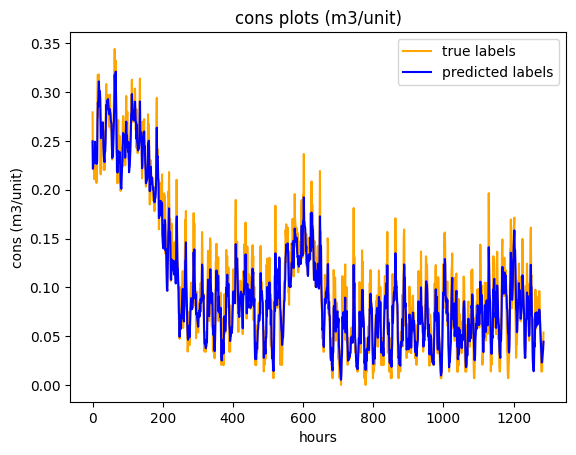

In [33]:
plt.plot(np.arange(len(y_test)),y_test, color='orange', label='true labels')
plt.plot(np.arange(len(y_test)),predicted, color='blue', label='predicted labels')
plt.title('cons plots (m3/unit)')
plt.xlabel('hours')
plt.ylabel('cons (m3/unit)')
plt.legend()

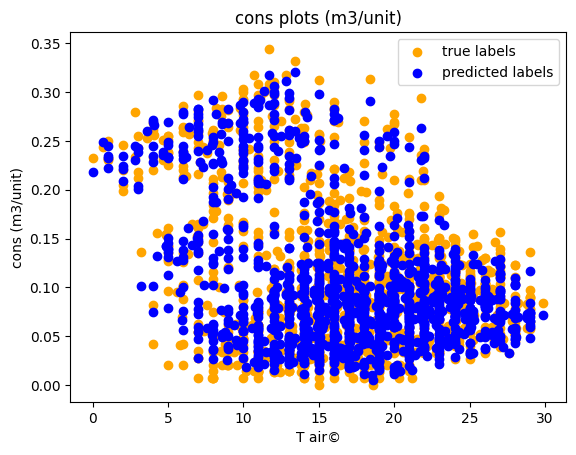

In [37]:
plt.scatter(X_test[:,5],y_test, color='orange', label='true labels')
plt.scatter(X_test[:,5],predicted, color='blue', label='predicted labels')
plt.title('cons plots (m3/unit)')
plt.xlabel('T air©')
plt.ylabel('cons (m3/unit)')
plt.legend()